##### Import Libraries

In [93]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D,  BatchNormalization, Add, Activation, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D,Dropout,MaxPool2D
from keras.optimizers import Adam
from keras.models import Sequential
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import layers, Sequential
from keras import applications 
from tensorflow.keras.optimizers import SGD
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Image to Pixels

In [243]:
# Path to the main flower dataset folder
dataset_folder = 'PetImages'

# List of class names
class_names = ['Cat','Dog']

# Load and preprocess images
data = []
labels = []

for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_folder, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        img = img.resize((80, 80))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_idx)


c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\PIL\TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


#### Cleaning

In [244]:
data[0].shape

(80, 80, 3)

In [245]:
print(len(data),"  ",len(labels))

24959    24959


In [247]:
for i in range(0,len(data)):
    if(data[i].shape!=(80,80,3)):
        data.pop(i)
        labels.pop(i)

In [248]:
print(len(data),"  ",len(labels))

24898    24898


#### Split data into train,val and test

In [249]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


In [250]:
# Print the shapes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (15934, 80, 80, 3)
y_train shape: (15934,)
x_val shape (3984, 80, 80, 3)
y_val shape : (3984,)
x_test shape: (4980, 80, 80, 3)
y_test shape: (4980,)


In [251]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

#### Convert labels to one-hot encoding

In [252]:
y_train = keras.utils.to_categorical(y_train, 2)
y_val = keras.utils.to_categorical(y_val, 2)
y_test = keras.utils.to_categorical(y_test, 2)

## Simple CNN 

In [81]:
#custom Model
customModel = Sequential()
customModel=Sequential(
    [
        layers.Conv2D(512,3,input_shape=(80,80,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(2,activation='softmax'),
    ]
)
customModel.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
customModel.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 512)       14336     
                                                                 
 batch_normalization_25 (Ba  (None, 32, 32, 512)       2048      
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 16, 16, 512)       0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 256)       1179904   
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 batch_normalization_26 (Ba  (None, 16, 16, 256)     

In [ ]:
checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)

In [83]:
history = customModel.fit(
    x_train,y_train,
    batch_size=128,
    epochs=1,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])

125/125 [==============================] - 407s 3s/step - loss: 0.1155 - accuracy: 0.9542 - val_loss: 0.4805 - val_accuracy: 0.8404


#### Validation Accuracy

In [84]:
val_loss, val_acc = customModel.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)

125/125 [==============================] - 20s 162ms/step - loss: 0.4805 - accuracy: 0.8404
Validation accuracy :  0.8403614163398743


#### Test Accuracy

In [85]:
score = customModel.evaluate(x_test, y_test)

156/156 [==============================] - 30s 192ms/step - loss: 0.4811 - accuracy: 0.8418


In [86]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.4811071455478668
Test accuracy: 0.8417670726776123


#### Training Accuracy v/s Validation Accuracy

In [111]:
print("History keys:", history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print("Training Accuracy:", acc)
print("Validation Accuracy:", val_acc)
print("Training Loss:",loss)
print("Validation Loss:", val_loss)


History keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
Training Accuracy: [0.9542487859725952]
Validation Accuracy: [0.8403614163398743]
Training Loss: [0.11545563489198685]
Validation Loss: [0.48047682642936707]


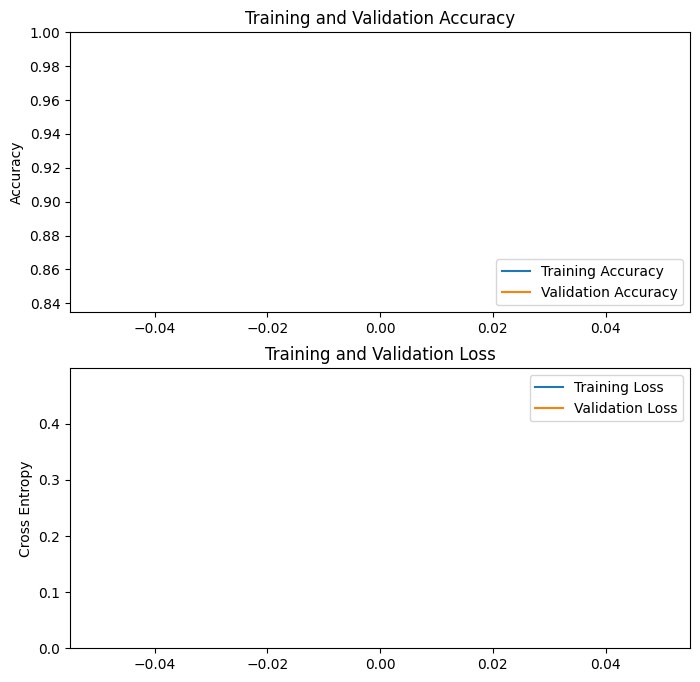

In [109]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

#### Confusion Matrix

125/125 [==============================] - 22s 170ms/step


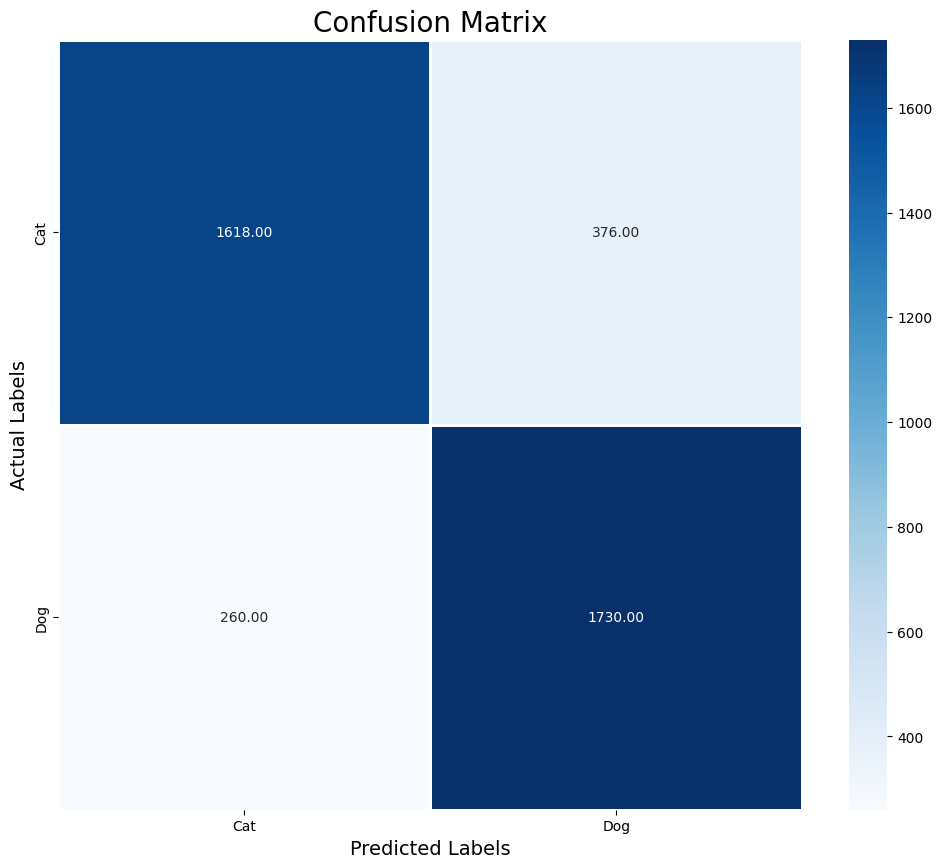

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1994
           1       0.82      0.87      0.84      1990

    accuracy                           0.84      3984
   macro avg       0.84      0.84      0.84      3984
weighted avg       0.84      0.84      0.84      3984



In [89]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))

## VGG

In [154]:
# download the data from g drive

import gdown
url = "https://drive.google.com/file/d/12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "catdog.zip")

12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP


Downloading...
From: https://drive.google.com/uc?/export=download&id=12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP
To: c:\Users\VAIBHAV\Downloads\DOG CAT CLASSIFICATION\catdog.zip
100%|██████████| 9.09M/9.09M [00:11<00:00, 796kB/s] 


'catdog.zip'

#### Validation Accuracy

In [190]:
from keras.applications.vgg16 import VGG16
epochs = 5

# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(80, 80, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the base model as a layer
model.add(base_model)

# Add custom layers on top of the base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [189]:
y_val

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

In [193]:
# Train the model
history=model.fit(
    x_train,y_train,
    epochs=2,
    validation_data=(x_val,y_val))

Epoch 1/2
498/498 [==============================] - 71s 142ms/step - loss: 0.5011 - accuracy: 0.7532 - val_loss: 0.5209 - val_accuracy: 0.7347
Epoch 2/2
498/498 [==============================] - 67s 135ms/step - loss: 0.4972 - accuracy: 0.7537 - val_loss: 0.5158 - val_accuracy: 0.7314


In [194]:
val_loss, val_acc = model.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)

125/125 [==============================] - 12s 92ms/step - loss: 0.5158 - accuracy: 0.7314
Validation accuracy :  0.7314257025718689


#### Test Accuracy

In [195]:
score = model.evaluate(x_test, y_test)

156/156 [==============================] - 15s 97ms/step - loss: 0.5107 - accuracy: 0.7444


In [196]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.5107477307319641
Test accuracy: 0.7443774938583374


#### Training Accuracy v/s Validation Accuracy

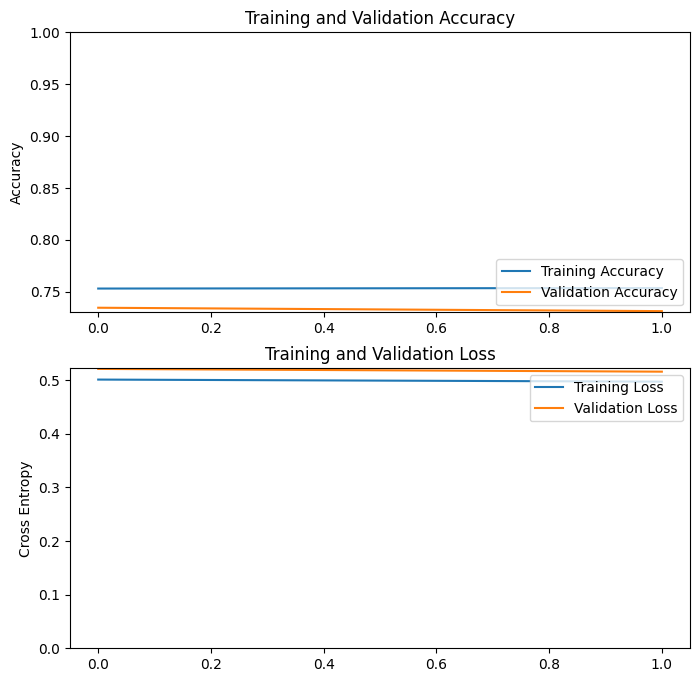

In [198]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

#### Confusion Matrix

125/125 [==============================] - 23s 183ms/step


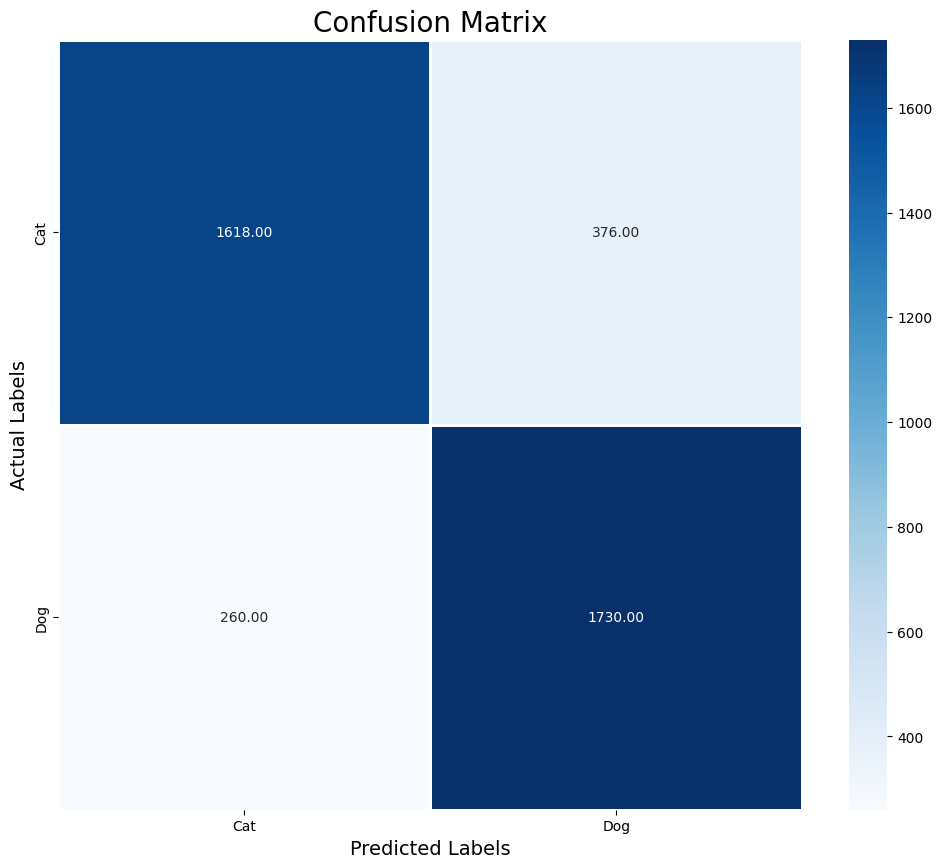

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1994
           1       0.82      0.87      0.84      1990

    accuracy                           0.84      3984
   macro avg       0.84      0.84      0.84      3984
weighted avg       0.84      0.84      0.84      3984



In [199]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))

## ResNet

In [200]:

# Residual block
def residual_block(x, filters, downsample=False):
    strides = (2, 2) if downsample else (1, 1)

    # First convolutional layer of the block
    y = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    # Second convolutional layer of the block
    y = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(y)
    y = BatchNormalization()(y)

    # Skip connection if downsample or number of filters change
    if downsample:
        x = Conv2D(filters, kernel_size=(1, 1), strides=(2, 2), padding='same')(x)

    # Add skip connection
    y = Add()([x, y])
    y = Activation('relu')(y)
    return y

# Build the ResNet model
def resnet(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual blocks
    x = residual_block(x, filters=16)
    x = residual_block(x, filters=16)
    x = residual_block(x, filters=32, downsample=True)
    x = residual_block(x, filters=32)
    x = residual_block(x, filters=64, downsample=True)
    x = residual_block(x, filters=64)

    # Average pooling and output layer
    x = AveragePooling2D(pool_size=(8, 8))(x)
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


In [201]:
# Create the ResNet model
model = resnet(input_shape=(80, 80, 3), num_classes=2)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [203]:
# Train
history=model.fit(x_train, y_train, batch_size=64, epochs=2, verbose=1,validation_split=0.2, shuffle=True)


Epoch 1/2
200/200 [==============================] - 62s 312ms/step - loss: 0.3109 - accuracy: 0.8640 - val_loss: 0.6585 - val_accuracy: 0.6843
Epoch 2/2
200/200 [==============================] - 60s 298ms/step - loss: 0.2627 - accuracy: 0.8905 - val_loss: 0.5132 - val_accuracy: 0.7851


#### Validation Accuracy

In [209]:
val_loss, val_acc = model.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)

125/125 [==============================] - 4s 30ms/step - loss: 0.5107 - accuracy: 0.7877
Validation accuracy :  0.7876505851745605


#### Test Accuracy

In [210]:
score = customModel.evaluate(x_test, y_test)

156/156 [==============================] - 29s 187ms/step - loss: 0.4811 - accuracy: 0.8418


#### Training Accuracy v/s Validation Accuracy

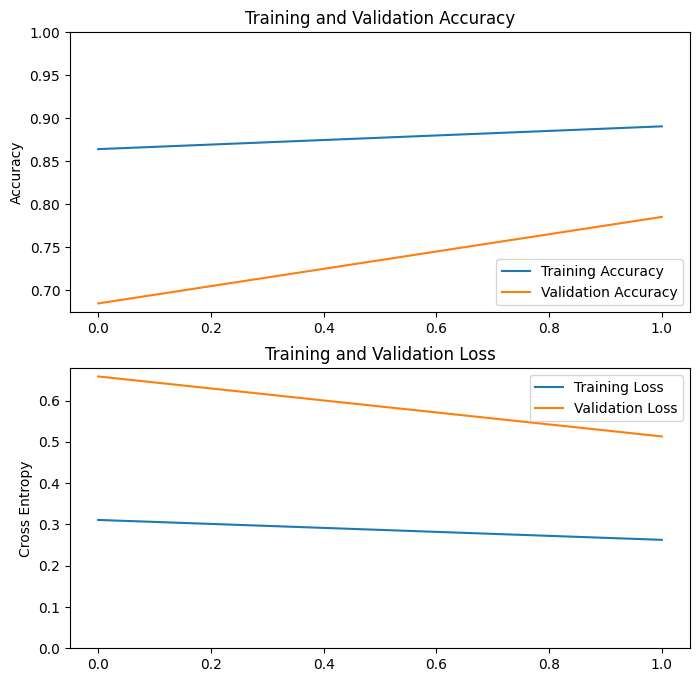

In [211]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

#### Confusion Matrix

125/125 [==============================] - 25s 202ms/step


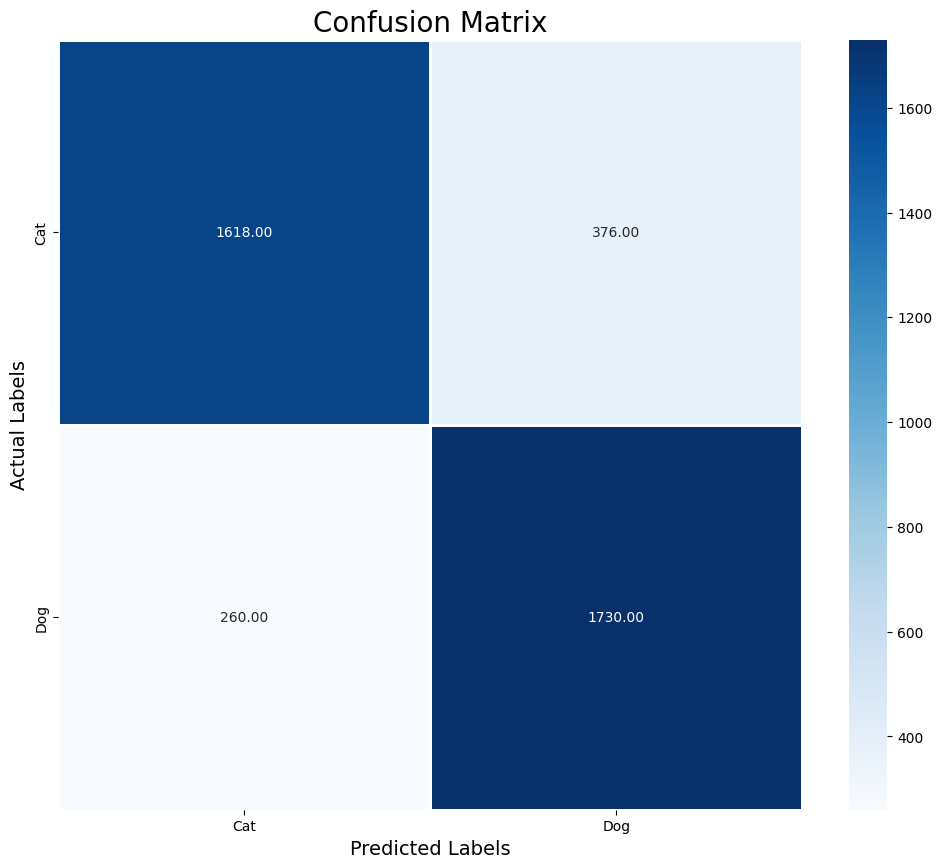

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1994
           1       0.82      0.87      0.84      1990

    accuracy                           0.84      3984
   macro avg       0.84      0.84      0.84      3984
weighted avg       0.84      0.84      0.84      3984



In [212]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))

## Inception

In [224]:
# download the data from g drive

import gdown
url = "https://drive.google.com/file/d/12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "catdog.zip")

12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP


Downloading...
From: https://drive.google.com/uc?/export=download&id=12jiQxJzYSYl3wnC8x5wHAhRzzJmmsCXP
To: c:\Users\VAIBHAV\Downloads\DOG CAT CLASSIFICATION\catdog.zip
100%|██████████| 9.09M/9.09M [00:11<00:00, 807kB/s] 


'catdog.zip'

In [225]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [253]:
# Load the InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(80, 80, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the base model as a layer
model.add(base_model)

# Add custom layers on top of the base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model
history=model.fit(
    x_train,y_train,
    epochs=2,
    validation_data=(x_val,y_val))

#### Validation Accuracy

In [288]:
val_loss, val_acc = model.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)

125/125 [==============================] - 13s 104ms/step - loss: 0.3985 - accuracy: 0.8281
Validation accuracy :  0.8280622363090515


#### Test Accuracy

In [289]:
score = model.evaluate(x_test, y_test)

156/156 [==============================] - 15s 91ms/step - loss: 0.3764 - accuracy: 0.8357


In [290]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.3763773441314697
Test accuracy: 0.8357429504394531


#### Training Accuracy v/s Validation Accuracy

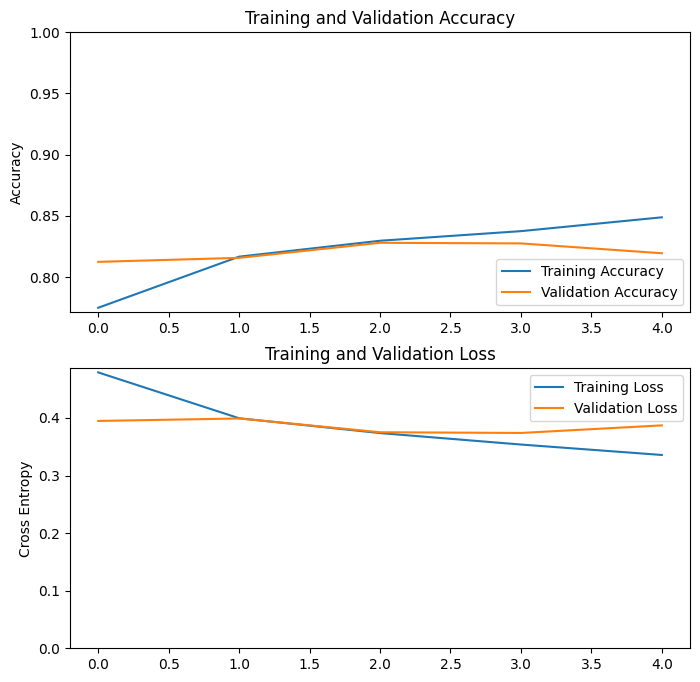

In [291]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

#### Confusion Matrix

125/125 [==============================] - 12s 92ms/step


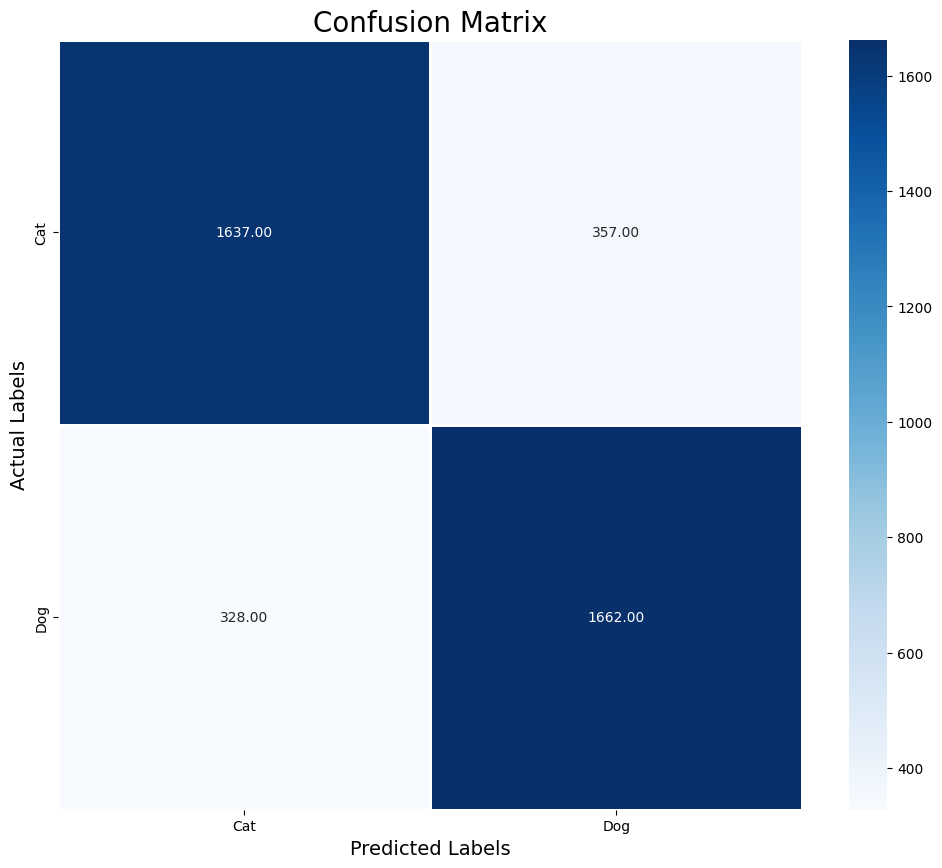

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1994
           1       0.82      0.84      0.83      1990

    accuracy                           0.83      3984
   macro avg       0.83      0.83      0.83      3984
weighted avg       0.83      0.83      0.83      3984



In [292]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=model.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))

### Save Model

###### Save the best Model (Test Accuracy)
###### history1-> Simple CNN (84.18)
###### history2-> VGG16 (74.44)
###### history3-> ResNet (84.18)
###### history4-> Inception (83.57)

In [293]:
customModel.save('Saved_Model')

INFO:tensorflow:Assets written to: Saved_Model\assets


INFO:tensorflow:Assets written to: Saved_Model\assets


#### Load Model

In [294]:
import tensorflow as tf
import numpy as np
from PIL import Image
import tensorflow as tf
model = tf.keras.models.load_model('Saved_Model')


#### Predict Image

In [295]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    
    # Convert to RGB in case the image has an alpha channel
    img = img.convert('RGB')
    
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [296]:
# Class names 
class_names = ['Cat','Dog']

In [297]:
# Predict the class
image_path = 'CAT IMG.png'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 342ms/step
Predicted class: Cat
